# Creating new poses
This notebook aims at helping you create new camera poses for your novel view synthesis. The new cameras are generated in a circle around a given camera. You can modify the number of camera, radius of the circle and depth of the targeted object.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from patches.cameras_utils import *

In [37]:
%matplotlib widget

In [61]:
scene='rose'
cameras = np.load(f'custom_data/{scene}/DTU_format/cameras.npz')

In [66]:
def compute_new_cameras(cameras, camera_index, ncameras, radius, depth, plot=True):
    extr = cameras['extrinsics'][camera_index]
    ref_point, ref_basis = compute_pos_base(extr)
    circle_on_plane = get_circle_on_plane(ncameras, radius, ref_point, ref_basis)
    circle_basis = get_circle_basis(depth, circle_on_plane, ref_point, ref_basis)
    new_extr = get_cameras_from_circle(circle_on_plane, circle_basis)
    if plot:
        all_extr = np.concatenate((cameras['extrinsics'], new_extr))
        _ = plot_cameras(all_extr)
    return new_extr

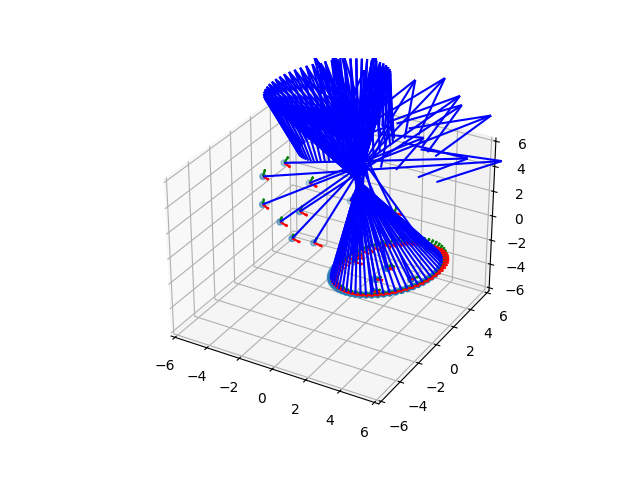

In [71]:
extr = compute_new_cameras(cameras,0, 60, 3, 6.5)

In [72]:
np.save(f'custom_data/{scene}/render_poses_raw.npy', extr)
np.savez(f'custom_data/{scene}/custom_poses', intrinsics=cameras['intrinsics'], extrinsincs=all_extr)